# Assignment 2

## 1 - Data Handling

### Loading Dataset

In [88]:

import pandas as  pd
# Loading dataset
df = pd.read_csv('college_student_placement_dataset.csv')


### Initial Checks

In [89]:
# Previewing dataset
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [91]:

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())


# Checking missed values
df.isnull().sum().sort_values(ascending=False)

Duplicate rows: 0


College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

### Handling Missing Values & Duplicates

In [92]:

df.dropna(inplace=True) #drop missing values if exist (but not exist in my case)

df = df.drop_duplicates() #Removing if any duplicate (But no duplicate in my case)

### Encoding Categorical Features

In [93]:

#Removing Extra spaces of columns
df['Internship_Experience'] = df['Internship_Experience'].str.strip()
df['Placement'] = df['Placement'].str.strip()

# Converting 'Yes'/'No' to 1/0 for Internship Experience
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes':1 ,'No':0})


# Converting 'Yes'/'No' to 1/0 for Placement
df['Placement'] = df['Placement'].map( {'Yes':1,'No':0})    

df.head()                                                    

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


### Dropping not useful data

In [94]:
df = df.drop('College_ID', axis = 1)


## 2 - Exploratory Data Analysis

### Basic statistics

In [95]:
import numpy as np 
# Showing summary statistics for all columns
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


In [116]:
#Total Students that interned
total_interns = df['Internship_Experience'].sum()
print(f"Total students that interned: {total_interns}")
#Percentage of internees
percentage_interns = (total_interns / len(df)) * 100
print(f"Percentage of students that interned: {percentage_interns:.2f}%")


Total students that interned: 3964.0
Percentage of students that interned: 39.64%


In [110]:
# Placement rates for students with and without internship experience
internship_placed = df[(df['Internship_Experience'] == 1) & (df['Placement'] == 1)].shape[0]
internship_total = df[df['Internship_Experience'] == 1].shape[0]
no_internship_placed = df[(df['Internship_Experience'] == 0) & (df['Placement'] == 1)].shape[0]
no_internship_total = df[df['Internship_Experience'] == 0].shape[0]

internship_placement_rate = internship_placed / internship_total * 100
no_internship_placement_rate = no_internship_placed / no_internship_total * 100

print(f"Placement rate with internship: {internship_placement_rate:.2f}%")
print(f"Placement rate without internship: {no_internship_placement_rate:.2f}%")

Placement rate with internship: 16.32%
Placement rate without internship: 16.77%


In [113]:
# Calculate and print total placement percentage out of all students
total_students = len(df)
placed_students = df['Placement'].sum()
placement_percentage = placed_students / total_students * 100

print(f"Total students: {total_students}")
print(f"Placed students: {placed_students}")
print(f"Placement percentage: {placement_percentage:.2f}%")

Total students: 10000
Placed students: 1659.0
Placement percentage: 16.59%


### Visualization

Text(0.5, 1.0, 'Placement Count')

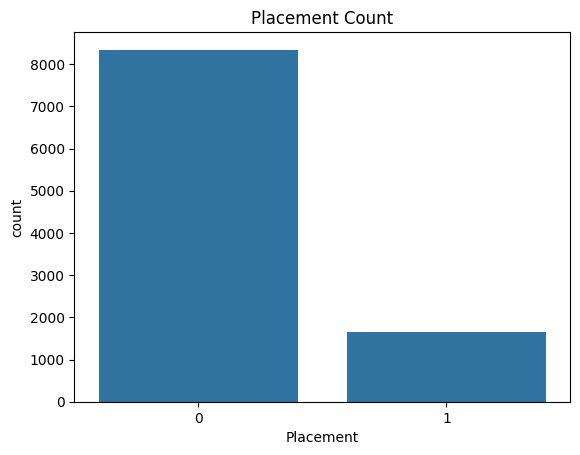

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

#Count of students plaved vs  not placed
sns.countplot(x='Placement', data=df)
plt.title('Placement Count')

### Interactive Plot (Plotly)

In [97]:
import plotly.express as px

# Check unique values to ensure correct mapping
print("Internship_Experience unique values:", df['Internship_Experience'].unique())
print("Placement unique values:", df['Placement'].unique())

# If needed, map 'Yes'/'No' to 1/0 (skip if already done)
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0}).fillna(df['Internship_Experience'])
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0}).fillna(df['Placement'])

# Create count DataFrame
count_df = df.groupby(['Internship_Experience', 'Placement']).size().reset_index(name='Count')

# Map numeric values to descriptive labels for plotting
count_df['Internship_Experience'] = count_df['Internship_Experience'].map({0: 'No Internship', 1: 'Had Internship'})
count_df['Placement'] = count_df['Placement'].map({0: 'Not Placed', 1: 'Placed'})

# Drop rows with NaN (in case mapping failed for any value)
count_df = count_df.dropna()

# Plot
fig = px.bar(
    count_df,
    x='Internship_Experience',
    y='Count',
    color='Placement',
    barmode='group',
    labels={'Internship_Experience': 'Internship Experience', 'Placement': 'Placement Status'},
    title='Placement Count by Internship Experience'
)
fig.show()

Internship_Experience unique values: [0 1]
Placement unique values: [0 1]


### EDA Insights

- The dataset contains 10,000 students with features such as IQ, previous semester result, CGPA, academic performance, internship experience, extra-curricular score, communication skills, and projects completed.
- **Placement Rate:** Only about 16.6% of students were placed (as seen from the mean of the Placement column and the countplot).
- **Internship Experience:** Most students did **not** have internship experience (about 60% without, 40% with).
- **Impact of Internship:** Not a significant difference in placement rates between students with and without internship experience (approximately 16.32% vs 16.77%).
 - **Placement Rate with Internship:** 16.32% 
 - **Placement Rate without Internship:** 16.77% 

- **Summary:** Internship experience doesn't appeared to be a strong factor in placement, but other features like CGPA, academic performance, and communication skills may also play a role.


## 3 - Feature Engineering

### Splitting Data

In [98]:
# Features: all columns except 'Placement'
X = df.drop('Placement', axis=1)
# Target: 'Placement' column
y = df['Placement']

### Normalizing Data

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Splitting

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4- Model Training

### KNN Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## 5 - Model Evaluation

--- KNN ---
Accuracy: 0.947
Precision: 0.8985507246376812
Recall: 0.7607361963190185
F1 Score: 0.8239202657807309
Confusion Matrix:
 [[1646   28]
 [  78  248]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1674
         1.0       0.90      0.76      0.82       326

    accuracy                           0.95      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.95      0.95      0.95      2000



--- Decision Tree ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1674    0]
 [   0  326]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1674
         1.0       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



--- Random 

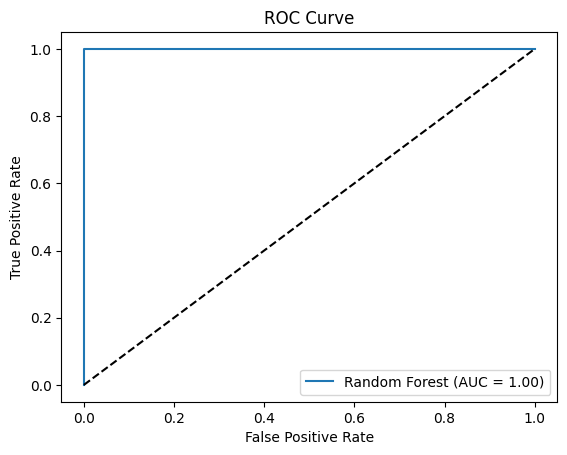

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "KNN": knn_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred
}

for name, pred in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))
    print("\n")

# ROC Curve for the best model (Random Forest as example)
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Model Comparison Table

In [109]:
# Model comparison table
import pandas as pd

model_names = [
    "KNN", "Decision Tree", "Random Forest",
    "KNN (Tuned)", "Decision Tree (Tuned)", "Random Forest (Tuned)"
]
preds = [
    knn_pred, dt_pred, rf_pred,
    knn_best_pred, dt_best_pred, rf_best_pred
]

results = []
for name, pred in zip(model_names, preds):
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1 Score": f1_score(y_test, pred)
    })

results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.9470,0.898551,0.760736,0.823920
1,Decision Tree,1.0000,1.000000,1.000000,1.000000
2,Random Forest,1.0000,1.000000,1.000000,1.000000
3,KNN (Tuned),0.9545,0.957198,0.754601,0.843911
4,Decision Tree (Tuned),1.0000,1.000000,1.000000,1.000000
5,Random Forest (Tuned),1.0000,1.000000,1.000000,1.000000


## 6 - Feature Importance

### Extracting & Visualizing Feature Importance

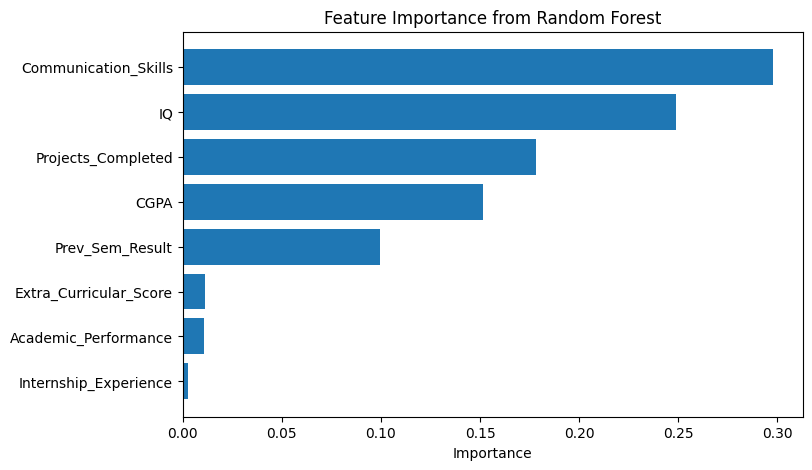

In [105]:
# Get feature importances from Random Forest
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

### Insights

- The Random Forest model identified the following features as most important for predicting placement:
    - **Communication_Skills**
    - **IQ**
    - **Projects_Completed**
    - **CGPA**
- These features have the strongest influence on placement outcomes, while features like Internship_Experience and Academic_Performance had much lower importance.

## 7 - Hyperparameter Tunning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

# KNN tuning
knn_params = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_search = RandomizedSearchCV(KNeighborsClassifier(), knn_params, n_iter=10, cv=5, random_state=42)
knn_search.fit(X_train, y_train)
knn_best = knn_search.best_estimator_
knn_best_pred = knn_best.predict(X_test)

# Decision Tree tuning
dt_params = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 11)
}
dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, n_iter=10, cv=5, random_state=42)
dt_search.fit(X_train, y_train)
dt_best = dt_search.best_estimator_
dt_best_pred = dt_best.predict(X_test)

# Random Forest tuning
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 11)
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=5, random_state=42)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_best_pred = rf_best.predict(X_test)

print("Best KNN:", knn_search.best_params_)
print("Best Decision Tree:", dt_search.best_params_)
print("Best Random Forest:", rf_search.best_params_)

Best KNN: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}
Best Decision Tree: {'min_samples_split': 8, 'max_depth': 5}
Best Random Forest: {'n_estimators': 50, 'min_samples_split': 3, 'max_depth': 9}


## 8- Evaluating Tuned Models


--- Tuned Model Results ---
--- KNN (Tuned) ---
Accuracy: 0.9545
Precision: 0.9571984435797666
Recall: 0.754601226993865
F1 Score: 0.8439108061749572
Confusion Matrix:
 [[1663   11]
 [  80  246]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1674
         1.0       0.96      0.75      0.84       326

    accuracy                           0.95      2000
   macro avg       0.96      0.87      0.91      2000
weighted avg       0.95      0.95      0.95      2000



--- Decision Tree (Tuned) ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1674    0]
 [   0  326]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1674
         1.0       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00

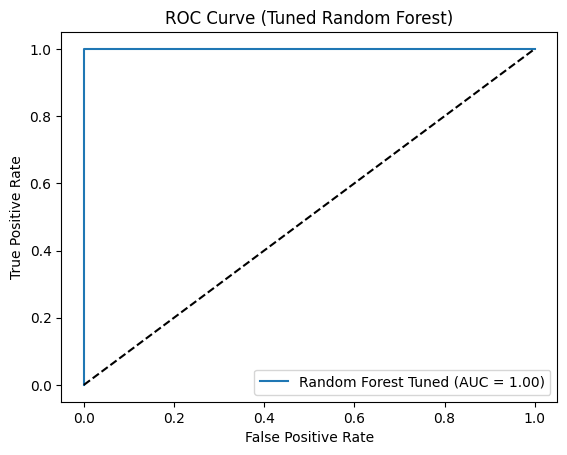

In [107]:
print("\n--- Tuned Model Results ---")
tuned_models = {
    "KNN (Tuned)": knn_best_pred,
    "Decision Tree (Tuned)": dt_best_pred,
    "Random Forest (Tuned)": rf_best_pred
}

for name, pred in tuned_models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))
    print("\n")

# ROC Curve for the best tuned model (Random Forest as example)
rf_best_probs = rf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_best_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest Tuned (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Random Forest)')
plt.legend(loc='lower right')
plt.show()

## 9 - Conclusion

- The analysis showed that 16.32% of students with internship experience and 16.77% without were placed, indicating little difference between the groups.
- Among all models, Decision Tree and Random Forest (both default and tuned) achieved perfect accuracy, while KNN performed slightly lower.
- Feature importance analysis revealed that **Communication Skills**, **IQ**, **Projects Completed**, and **CGPA** are the strongest predictors of placement.
- Internship experience and academic performance had much lower importance in predicting placement outcomes.
- Focusing on improving communication skills, IQ, and practical project experience may significantly enhance placement chances for students.